In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from sklearn import svm
from sklearn import datasets
from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay
from matplotlib import cm

## Helper function for different SVC kernels to classify datasets

In [2]:
def SVC_modelfit(xdata=None, ydata=None, SVC_Type='linear', myC = 0.1, polydegree = 2):
    
    if SVC_Type=='linear':
        modelSVC = svm.SVC(kernel = 'linear', C=myC)
        plotTitle = "SVC Linear, C =" + str(myC)
    if SVC_Type=='poly':
        modelSVC = svm.SVC(kernel = 'poly', degree=polydegree, C=myC)
        plotTitle = "SVC poly - degree = " + str(polydegree) + " C= " +str(myC)
    if SVC_Type=='rbf':
        modelSVC = svm.SVC(kernel = 'rbf', C=myC)
        plotTitle = "SVC rbf, C= " + str(myC)
    if SVC_Type=='sigmoid':
        modelSVC = svm.SVC(kernel = 'sigmoid', C=myC)
        plotTitle = "SVC sigmoid, C= " + str(myC)
    
    modelSVC.fit(xdata,ydata)

    return modelSVC,plotTitle
    

### Helper function for drawing data by class

In [3]:
def drawData(X,y,title):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                     np.arange(x2_min, x2_max, 0.1))               
    #fig = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 8))
    plt.figure(figsize=(10, 8))
    #plt.contourf(xx1,xx2, Z, alpha = 0.4, cmap="binary")
    #plt.scatter(X[:, 0], X[:, 1], c=-y, cmap="jet", alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, alpha=0.9)
    plt.title(title)



### Helper function for drawing a decision boundary on a graph

In [4]:
def drawDecisionBoundary(model,X,y,title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))               
    #fig = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 8))
    plt.figure(figsize=(10, 8))

    #Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    #plt.contourf(xx,yy, Z, alpha = 0.3, cmap="binary")
    plt.contourf(xx,yy, Z, alpha = 0.3, cmap=plt.cm.PuOr_r)
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                           linestyles='dashed')

    #highlight the support vectors
    svecs = X[model.support_]
    plt.scatter(svecs[:, 0], svecs[:, 1], alpha=0.9, s=100, edgecolors='k',facecolors='none')

    #plot the points from the dataset
    #plt.scatter(X[:, 0], X[:, 1], c=-y, cmap="jet", alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, alpha=0.9)
    fullTitle = title+" (support vector quantity: "+ str(model.support_.shape[0])+ ")"
    plt.title(fullTitle)
    


### Set up the global variables for the data

In [5]:
my_seed=2021
rng = np.random.RandomState(my_seed)
dsetSize = 400

## Dataset 1:  Blobs

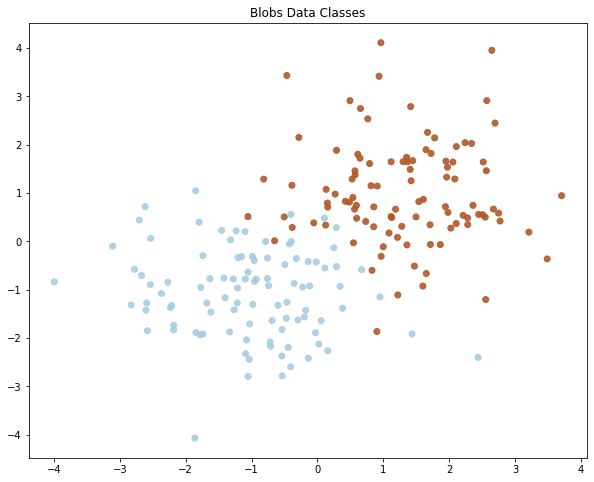

In [6]:
#generate blobs which are not quite linearly separable
X,y = datasets.make_blobs(dsetSize,1.5,centers = [[-1.2,-1.2],[1.2,1.2]],
                          random_state = rng)

X_blob,X_blob_val,y_blob,y_blob_val = train_test_split(X,y,test_size=0.5,random_state=rng)  #use valset for performance eval

drawData(X_blob,y_blob,"Blobs Data Classes")

# STUDENT CODING SECTION

Now it is time to try your hand at selecting hypeparameters for a support vector classifier on three different datasets:
* blob dataset:  noisy gaussian blob dataset which is almost linearly separable
* ring dataset:  concentric circles with noise (not linearly separable, simple boundary)
* moon dataset:  interleaved crescents with noise (not linearly separable, complex boundary)


## CODING PART 1:  Fitting Support vector classifier to the blob dataset
### Select model type and hyperparameters to make the model fit well (visually) on dataset

See https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html for details on the hyperparameters (kernel, C and degree)

This dataset is fairly easy to fit with a linear kernel, however you can control the regularization by varying myC from close to zero (needs to be a positive value) to a very large number.  How does this affect the number of support vectors?

Also, try a polynomial (```poly``` with various ```polydegree```s), ```rbf``` and ```sigmoid``` kernel to see what happens when you use more flexible models... do you need to increase the regularization (```myC```) to keep them from overfitting?



#### Heads up... if you get this warning:
```
<ipython-input-4-6fe8767a7430>:15: UserWarning: No contour levels were found within the data range.
  contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
```
it means that the contour at 0 (the class discrimination line) is not visible in the figure - it is completely off the figure - outside of the visible region... Decisions can still be made during predictions, but the model is probably not going to perform well on future data because it is likely declaring that every observation is the same class!

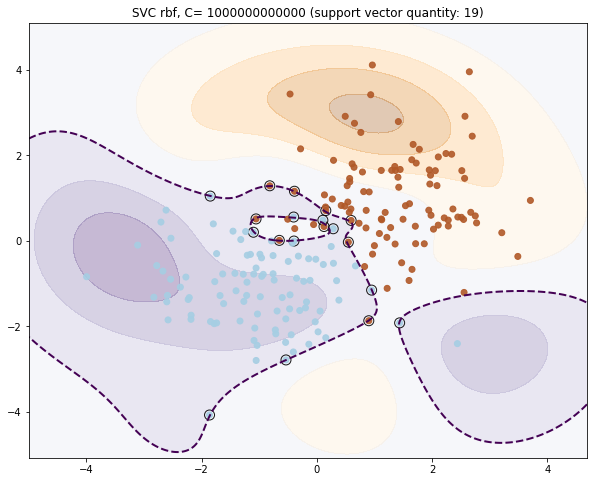

Validation Set Accuracy: 0.91


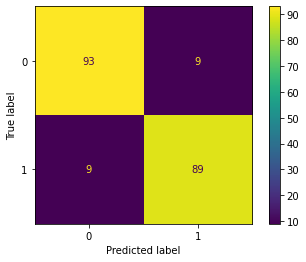

In [7]:
# ------------- STUDENT CODE MODIFICATION SECTION ----------------------

SVC_kernel='rbf'          #try different kernels: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’
myC = 1000000000000                  #try different values for C (regularization parameter)
polydegree = 2             #try different degrees (will be ignored unless poly kernel)

#  ------------- END STUDENT CODE MODIFICATION SECTION ----------------------


xdata = X_blob
ydata = y_blob
xval = X_blob_val
yval = y_blob_val

mymodel, plotTitle = SVC_modelfit(xdata=xdata,ydata=ydata,
                                  SVC_Type=SVC_kernel,
                                  myC=myC, polydegree=polydegree)
drawDecisionBoundary(mymodel,xdata,ydata,plotTitle)
plt.show()

myValAccuracy = mymodel.score(xval,yval)
print("Validation Set Accuracy:",myValAccuracy)
y_pred = mymodel.predict(xval)
# plot_confusion_matrix(mymodel,xval, yval) 
disp = ConfusionMatrixDisplay.from_estimator(mymodel,xval, yval) 
plt.show()

In the graph above, the data is scatterplotted.  The decision boundary is shown with a dotted line.
The quantity of support vectors used in the model is shown, and the support vectors are indicated with a black circle around the datapoint.  Additionally, a countour map displays the decision function the support vector classifier is using.


## Dataset 2: Concentric circle (ring)

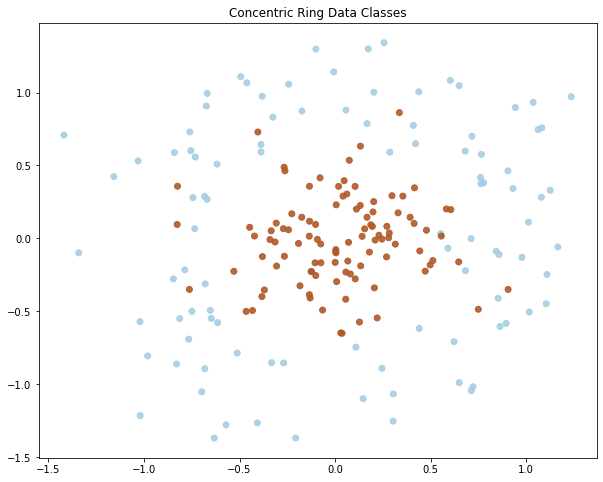

In [8]:
# generate concentric ring data
circleNoise = 0.25
innerCircleFactor = 0.3
X,y = datasets.make_circles(n_samples=dsetSize, noise = circleNoise,
                        factor = innerCircleFactor, random_state = rng )

X_ring,X_ring_val,y_ring,y_ring_val = train_test_split(X,y,test_size=0.5,random_state=rng)  #use valset for performance eval


drawData(X_ring,y_ring,"Concentric Ring Data Classes")

## CODING PART 2:  Fitting Support vector classifier to the concentric circle dataset
### Select model type and hyperparameters to make the model fit well (visually) on the dataset

See https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html for details on the hyperparameters (kernel, C and degree)

As you can see, this dataset cannot be fit with a linear kernel...

Try a polynomial (```poly``` with various ```polydegree```s), ```rbf``` and ```sigmoid``` kernel to see what happens when you use more flexible models... do you need to increase the regularization (```myC```) to keep them from overfitting?


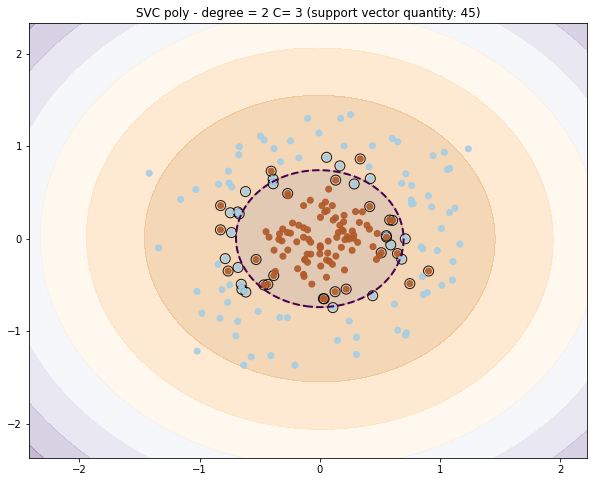

Validation Set Accuracy: 0.925


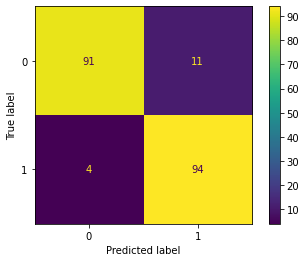

In [9]:
# ------------- STUDENT CODE MODIFICATION SECTION ----------------------

SVC_kernel='poly'          #try different kernels: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’
myC = 3                 #try different values for C (regularization parameter)
polydegree = 2             #try different degrees (will be ignored unless poly kernel)

#  ------------- END STUDENT CODE MODIFICATION SECTION ----------------------


xdata = X_ring
ydata = y_ring
xval = X_ring_val
yval = y_ring_val

mymodel, plotTitle = SVC_modelfit(xdata=xdata,ydata=ydata,
                                  SVC_Type=SVC_kernel,
                                  myC=myC, polydegree=polydegree)
drawDecisionBoundary(mymodel,xdata,ydata,plotTitle)
plt.show()

myValAccuracy = mymodel.score(xval,yval)
print("Validation Set Accuracy:",myValAccuracy)
y_pred = mymodel.predict(xval)
# plot_confusion_matrix(mymodel,xval, yval) 
disp = ConfusionMatrixDisplay.from_estimator(mymodel,xval, yval) 
plt.show()

## Dataset 3: Interleaved crescents (moon)

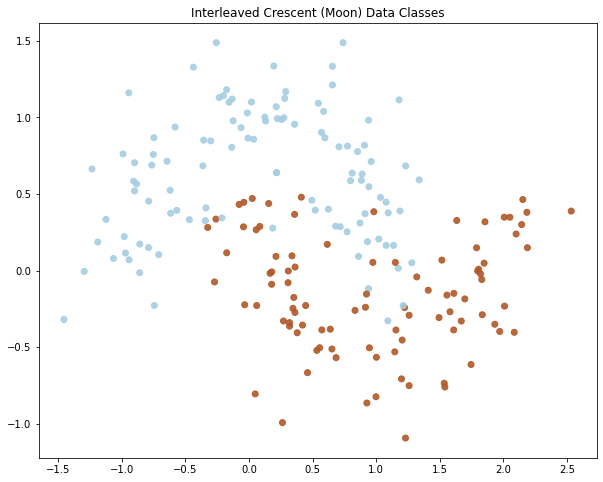

In [10]:
# Generate a pair of moons which are interleaved
moonNoise = 0.15

X,y = datasets.make_moons(n_samples=dsetSize, noise = circleNoise,random_state = rng )

X_moon,X_moon_val,y_moon,y_moon_val = train_test_split(X,y,test_size=0.5,random_state=rng)  #use valset for performance eval


drawData(X_moon,y_moon,"Interleaved Crescent (Moon) Data Classes")

## CODING PART 3:  Fitting Support vector classifier to the moon dataset
### Select model type and hyperparameters to make the model fit well (visually) on the dataset

See https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html for details on the hyperparameters (kernel, C and degree)

As you can see, this dataset doesnt work well with a linear kernel...and the boundary is more complicated than in the ring dataset...

Try a polynomial (```poly``` with various ```polydegree```s), ```rbf``` and ```sigmoid``` kernel to see what happens when you use more flexible models... do you need to increase the regularization (```myC```) to keep them from overfitting?


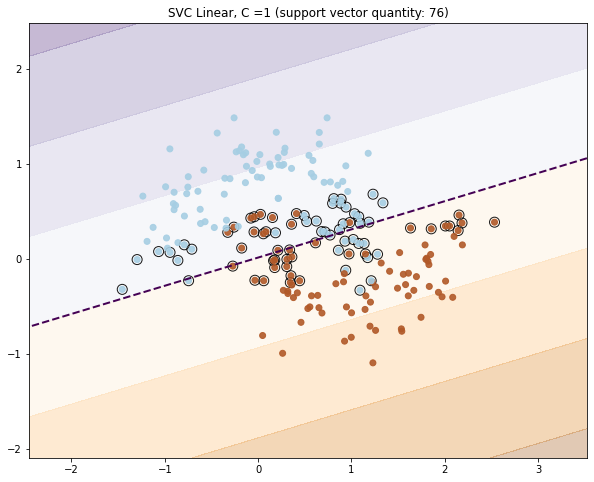

Validation Set Accuracy: 0.88


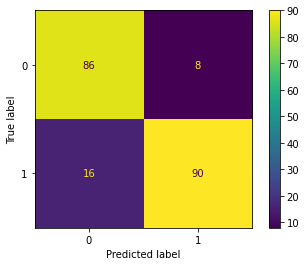

In [11]:
# ------------- STUDENT CODE MODIFICATION SECTION ----------------------

SVC_kernel='linear'          #try different kernels: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’
myC = 1                  #try different values for C (regularization parameter)
polydegree = 2             #try different degrees (will be ignored unless poly kernel)

#  ------------- END STUDENT CODE MODIFICATION SECTION ----------------------


xdata = X_moon
ydata = y_moon
xval = X_moon_val
yval = y_moon_val

mymodel, plotTitle = SVC_modelfit(xdata=xdata,ydata=ydata,
                                  SVC_Type=SVC_kernel,
                                  myC=myC, polydegree=polydegree)
drawDecisionBoundary(mymodel,xdata,ydata,plotTitle)
plt.show()

myValAccuracy = mymodel.score(xval,yval)
print("Validation Set Accuracy:",myValAccuracy)
y_pred = mymodel.predict(xval)
# plot_confusion_matrix(mymodel,xval, yval) 
disp = ConfusionMatrixDisplay.from_estimator(mymodel,xval, yval) 
plt.show()
 